Data preparation

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import Counter

In [48]:
dt = pd.read_csv("dataset.csv")
dt = dt.loc[:, ~dt.columns.isin(['Country Code', 'Indicator Name', 'Attribute', 'Unnamed: 226'])]
dt = dt.rename(columns= {"Country Name":"name", "Indicator Code": "code"})
dt.head()

country_list = dt.name.unique()
indicator_list = dt.code.unique()
time_data = dt.columns[2:].to_numpy(dtype=np.int64)

In [51]:
prod_dt = dt.loc[dt['code'] == 'NGDP']
debt_dt = dt.loc[dt['code'] == 'GGXWDG']
rate_dt = dt.loc[dt['code'] == 'GGXWDG_GDP']

(1963, 42)


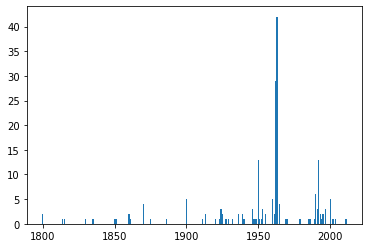

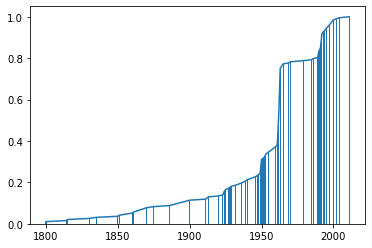

In [176]:
year_counter = prod_dt.iloc[:,2:].apply(pd.Series.first_valid_index, axis=1).to_numpy(dtype=np.int64)
year_counter = np.sort(year_counter)

counts = Counter(year_counter)
data = sorted(counts.items())

print(counts.most_common()[0])
x = [el[0] for el in data]
y = [el[1] for el in data]

new_y = []

for i in range(len(y)):
    value = 0
    for j in range(0,i+1):
        value = value + y[j]
    new_y.append(value)


        
new_y = np.array(new_y) / 193


plt.bar(x,y)
plt.show()
plt.bar(x, new_y)
plt.plot(x,new_y)
plt.show()

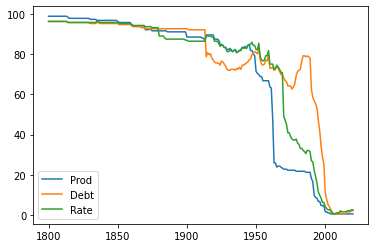

In [82]:

missing_prod_dt = prod_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100
missing_debt_dt = debt_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100
missing_rate_dt = rate_dt.isna().sum().to_numpy()[2:] / len(country_list) * 100

plt.plot(time_data, missing_prod_dt, label="Prod")
plt.plot(time_data, missing_debt_dt, label="Debt")
plt.plot(time_data, missing_rate_dt, label="Rate")
plt.legend()
plt.show()

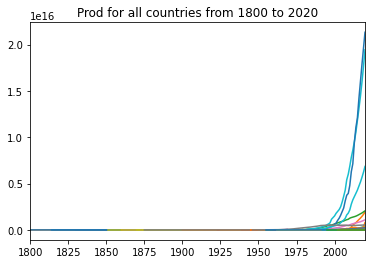

In [104]:
ac_data = prod_dt.iloc[:, 2:].to_numpy()

for row in ac_data:
    plt.plot(time_data, row)
plt.xlim([1800, 2020])
plt.title("Prod for all countries from 1800 to 2020")
plt.show()

221 221


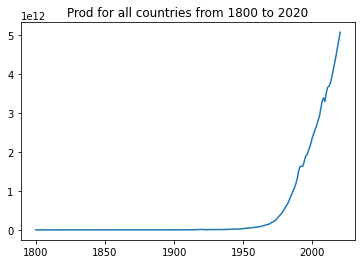

In [110]:
ac_data = prod_dt.iloc[:, 2:].to_numpy()

print(len(time_data), len(ac_data[90]))
plt.plot(time_data, ac_data[90])
plt.title("Prod for all countries from 1800 to 2020")
plt.show()